In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
import nltk
from tensorflow import keras
from sklearn.model_selection import train_test_split
from nltk.stem.wordnet import WordNetLemmatizer
import re
from tensorflow.keras.layers import Embedding,Flatten,Dense,Conv1D,MaxPooling1D
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
import plotly.express as px
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import Sequential
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("twitter_racism_parsed_dataset.csv")
df

,index,id,Text,Annotation,oh_label
0,5.770000e+17,5.770000e+17,@AAlwuhaib1977 Muslim mob violence against Hin...,racism,1
1,5.410000e+17,5.410000e+17,#NULL!,none,0
2,5.680000e+17,5.680000e+17,@jncatron @isra_jourisra @AMPalestine Islamoph...,racism,1
3,5.770000e+17,5.770000e+17,"Finally I'm all caught up, and that sudden dea...",none,0
4,5.710000e+17,5.710000e+17,@carolinesinders @herecomesfran *hugs*,none,0
...,...,...,...,...,...
13466,5.760000e+17,5.760000e+17,#mkr NOOOOO!!! I wanted Kat and Andre to lose!!!,none,0
13467,5.580000e+17,5.580000e+17,RT @MumtazCeltik: @WhiteHouse @VP \n\n#Kobane ...,none,0
13468,5.760000e+17,5.760000e+17,Glad the proper competition is starting and ev...,none,0
13469,5.760000e+17,5.760000e+17,"No worries Pete and Manu, take all the time of...",none,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 0 to 13470
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       13471 non-null  float64
 1   id          13471 non-null  float64
 2   Text        13471 non-null  object 
 3   Annotation  13471 non-null  object 
 4   oh_label    13471 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 526.3+ KB


In [ ]:
df.drop(['index', 'id'], inplace=True, axis=1)
df

,Text,Annotation,oh_label
0,@AAlwuhaib1977 Muslim mob violence against Hin...,racism,1
1,#NULL!,none,0
2,@jncatron @isra_jourisra @AMPalestine Islamoph...,racism,1
3,"Finally I'm all caught up, and that sudden dea...",none,0
4,@carolinesinders @herecomesfran *hugs*,none,0
...,...,...,...
13466,#mkr NOOOOO!!! I wanted Kat and Andre to lose!!!,none,0
13467,RT @MumtazCeltik: @WhiteHouse @VP \n\n#Kobane ...,none,0
13468,Glad the proper competition is starting and ev...,none,0
13469,"No worries Pete and Manu, take all the time of...",none,0


In [ ]:
df.loc[df['oh_label'] == 1,'Annotation'] = 'cyberbullying'
df.loc[df['oh_label'] != 1,'Annotation'] = 'not_cyberbullying'

In [ ]:
df

,Text,Annotation,oh_label
0,@AAlwuhaib1977 Muslim mob violence against Hin...,cyberbullying,1
1,#NULL!,not_cyberbullying,0
2,@jncatron @isra_jourisra @AMPalestine Islamoph...,cyberbullying,1
3,"Finally I'm all caught up, and that sudden dea...",not_cyberbullying,0
4,@carolinesinders @herecomesfran *hugs*,not_cyberbullying,0
...,...,...,...
13466,#mkr NOOOOO!!! I wanted Kat and Andre to lose!!!,not_cyberbullying,0
13467,RT @MumtazCeltik: @WhiteHouse @VP \n\n#Kobane ...,not_cyberbullying,0
13468,Glad the proper competition is starting and ev...,not_cyberbullying,0
13469,"No worries Pete and Manu, take all the time of...",not_cyberbullying,0


In [ ]:
df[['Annotation', 'oh_label']].value_counts()     #display the counts of unique combinations of values in the specified columns 'Annotation' and 'oh_label'

Annotation         oh_label
not_cyberbullying  0           11501
cyberbullying      1            1970
dtype: int64

In [ ]:
df

,Text,Annotation,oh_label
0,@AAlwuhaib1977 Muslim mob violence against Hin...,cyberbullying,1
1,#NULL!,not_cyberbullying,0
2,@jncatron @isra_jourisra @AMPalestine Islamoph...,cyberbullying,1
3,"Finally I'm all caught up, and that sudden dea...",not_cyberbullying,0
4,@carolinesinders @herecomesfran *hugs*,not_cyberbullying,0
...,...,...,...
13466,#mkr NOOOOO!!! I wanted Kat and Andre to lose!!!,not_cyberbullying,0
13467,RT @MumtazCeltik: @WhiteHouse @VP \n\n#Kobane ...,not_cyberbullying,0
13468,Glad the proper competition is starting and ev...,not_cyberbullying,0
13469,"No worries Pete and Manu, take all the time of...",not_cyberbullying,0


**Let's drop duplicates**

In [ ]:
print(df.duplicated().sum())        # the sum of duplicated rows in the DataFrame
df=df.drop_duplicates()             #removes duplicate rows from the original DataFrame.
print(df.duplicated().sum())

0
0


**How long are the messages in each category?**

In [ ]:
nltk.download('punkt')
#get the number of words in every tweet
def length(text):
    return len(word_tokenize(text))
df=df.copy()
df['word_count'] = df['Text'].apply(length)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
fig = px.histogram(df, x="word_count", color="Annotation", title="Words in the tweet (including very long tweets)")
fig.show()
px.histogram(df[df.word_count<20], x="word_count", color="Annotation", title="Words in the tweet (excluding very long tweets)")

**The wordclouds for every type of cyberbullying**

Non-Cyberbullying


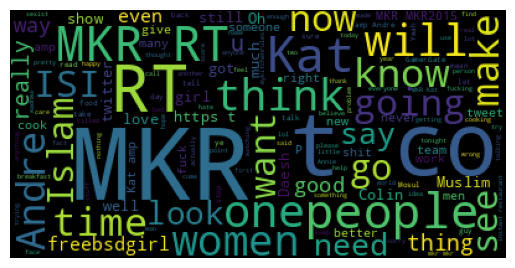

Cyberbullying


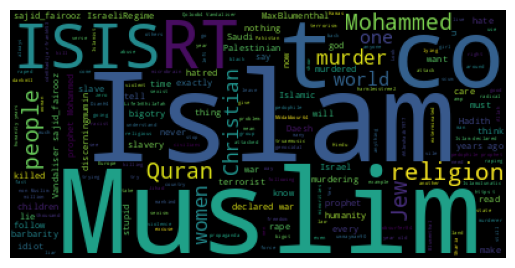

In [ ]:
print("Non-Cyberbullying")
text = " ".join(review for review in df[df.oh_label==0].Text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print("Cyberbullying")
text = " ".join(review for review in df[df.oh_label==1].Text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Feature engineering and data preprocessing**

In [ ]:
def remove_punct(text):
  return text.translate(str.maketrans('', '',string.punctuation))

df['no_punctuation'] = df['Text'].apply(lambda x: remove_punct(x))

In [ ]:
df.head()

,Text,Annotation,oh_label,word_count,no_punctuation
0,@AAlwuhaib1977 Muslim mob violence against Hin...,cyberbullying,1,18,AAlwuhaib1977 Muslim mob violence against Hind...
1,#NULL!,not_cyberbullying,0,3,NULL
2,@jncatron @isra_jourisra @AMPalestine Islamoph...,cyberbullying,1,26,jncatron israjourisra AMPalestine Islamophobia...
3,"Finally I'm all caught up, and that sudden dea...",not_cyberbullying,0,23,Finally Im all caught up and that sudden death...
4,@carolinesinders @herecomesfran *hugs*,not_cyberbullying,0,7,carolinesinders herecomesfran hugs


In [ ]:
df['no_punctuation']

0        AAlwuhaib1977 Muslim mob violence against Hind...
1                                                     NULL
2        jncatron israjourisra AMPalestine Islamophobia...
3        Finally Im all caught up and that sudden death...
4                       carolinesinders herecomesfran hugs
                               ...                        
13466            mkr NOOOOO I wanted Kat and Andre to lose
13467    RT MumtazCeltik WhiteHouse VP \n\nKobane \n\nJ...
13468    Glad the proper competition is starting and ev...
13469    No worries Pete and Manu take all the time off...
13470    mykitchenrules mkr please kick off that lady w...
Name: no_punctuation, Length: 13471, dtype: object

In [ ]:
nltk.download('stopwords')
def lower(text):
    return text.lower()
df['no_punctuation'] = df['no_punctuation'].apply(lower)
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    new_text = []
    for el in word_tokenize(text):
        if not el in stop_words:
            new_text.append(el)
    return new_text
df['no_stopwords'] = df.no_punctuation.apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Let's separate words and emojis.**

In [ ]:
def smile_handle(word_list):
  new_word_list = []
  emoji_pattern = re.compile(r"([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])", flags=re.UNICODE)
  for word in word_list:
    if len(re.findall(emoji_pattern,word))!=0:
      if len(re.findall(emoji_pattern,word))!=len(word):
        new_word_list.append(re.sub(emoji_pattern,'',word))
      new_word_list.extend(re.findall(emoji_pattern,word))
    else:
      new_word_list.append(word)
  for i,el in enumerate(new_word_list):
    if type(el)==tuple:
      new_word_list[i] = el[1]
  return new_word_list

df.no_stopwords = df.no_stopwords.apply(smile_handle)

**Let's standartize words with the help of lemmatization**

In [ ]:
nltk.download('wordnet')
def lemmatize(words):
    new_words = []
    lem = WordNetLemmatizer()
    for w in words:
        new_words.append(lem.lemmatize(w))
    return new_words

df['lemmatized'] = df.no_stopwords.apply(lemmatize)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df

,Text,Annotation,oh_label,word_count,no_punctuation,no_stopwords,lemmatized
0,@AAlwuhaib1977 Muslim mob violence against Hin...,cyberbullying,1,18,aalwuhaib1977 muslim mob violence against hind...,"[aalwuhaib1977, muslim, mob, violence, hindus,...","[aalwuhaib1977, muslim, mob, violence, hindu, ..."
1,#NULL!,not_cyberbullying,0,3,null,[null],[null]
2,@jncatron @isra_jourisra @AMPalestine Islamoph...,cyberbullying,1,26,jncatron israjourisra ampalestine islamophobia...,"[jncatron, israjourisra, ampalestine, islamoph...","[jncatron, israjourisra, ampalestine, islamoph..."
3,"Finally I'm all caught up, and that sudden dea...",not_cyberbullying,0,23,finally im all caught up and that sudden death...,"[finally, im, caught, sudden, death, cook, loo...","[finally, im, caught, sudden, death, cook, loo..."
4,@carolinesinders @herecomesfran *hugs*,not_cyberbullying,0,7,carolinesinders herecomesfran hugs,"[carolinesinders, herecomesfran, hugs]","[carolinesinders, herecomesfran, hug]"
...,...,...,...,...,...,...,...
13466,#mkr NOOOOO!!! I wanted Kat and Andre to lose!!!,not_cyberbullying,0,16,mkr nooooo i wanted kat and andre to lose,"[mkr, nooooo, wanted, kat, andre, lose]","[mkr, nooooo, wanted, kat, andre, lose]"
13467,RT @MumtazCeltik: @WhiteHouse @VP \n\n#Kobane ...,not_cyberbullying,0,22,rt mumtazceltik whitehouse vp \n\nkobane \n\nj...,"[rt, mumtazceltik, whitehouse, vp, kobane, jes...","[rt, mumtazceltik, whitehouse, vp, kobane, jes..."
13468,Glad the proper competition is starting and ev...,not_cyberbullying,0,16,glad the proper competition is starting and ev...,"[glad, proper, competition, starting, even, ha...","[glad, proper, competition, starting, even, ha..."
13469,"No worries Pete and Manu, take all the time of...",not_cyberbullying,0,29,no worries pete and manu take all the time off...,"[worries, pete, manu, take, time, need, fact, ...","[worry, pete, manu, take, time, need, fact, fe..."


**Let's form the vocabulary and get its length**

In [ ]:
vocab = Counter()

In [ ]:
def add_to_vocab(words):
  global vocab
  vocab.update(words)
df.lemmatized.apply(add_to_vocab)
global vocab_size
vocab_size = len(vocab)
print("Vocabulary size: ",vocab_size)

Vocabulary size:  19939


**Top-50 words**

In [ ]:
vocab.most_common(50)

[('mkr', 4008),
 ('rt', 2161),
 ('islam', 908),
 ('muslim', 784),
 ('like', 772),
 ('kat', 715),
 ('im', 680),
 ('dont', 630),
 ('people', 618),
 ('amp', 540),
 ('woman', 532),
 ('one', 521),
 ('get', 518),
 ('isi', 472),
 ('andre', 446),
 ('would', 412),
 ('time', 401),
 ('think', 399),
 ('go', 376),
 ('know', 354),
 ('want', 342),
 ('make', 341),
 ('good', 315),
 ('going', 307),
 ('thing', 301),
 ('say', 293),
 ('really', 290),
 ('cant', 284),
 ('look', 279),
 ('see', 278),
 ('maxblumenthal', 257),
 ('u', 254),
 ('need', 251),
 ('oh', 243),
 ('mohammed', 240),
 ('even', 238),
 ('thats', 234),
 ('mkr2015', 232),
 ('year', 231),
 ('way', 230),
 ('well', 223),
 ('ive', 221),
 ('girl', 219),
 ('still', 218),
 ('right', 218),
 ('mykitchenrules', 216),
 ('never', 214),
 ('quran', 209),
 ('daesh', 209),
 ('show', 204)]

**Let's drop too unfrequent words!**

In [ ]:
words = [key for key,val in vocab.items() if val>=3]
vocab_size = len(words)
print(vocab_size)
def remove_rare(text):
    global words
    for el in text:
        if not el in words:
            text.remove(el)
    return text

df.lemmatized = df.lemmatized.apply(remove_rare)

5811


In [ ]:
df

,Text,Annotation,oh_label,word_count,no_punctuation,no_stopwords,lemmatized
0,@AAlwuhaib1977 Muslim mob violence against Hin...,cyberbullying,1,18,aalwuhaib1977 muslim mob violence against hind...,"[aalwuhaib1977, muslim, mob, violence, hindus,...","[aalwuhaib1977, muslim, mob, violence, hindu, ..."
1,#NULL!,not_cyberbullying,0,3,null,[null],[]
2,@jncatron @isra_jourisra @AMPalestine Islamoph...,cyberbullying,1,26,jncatron israjourisra ampalestine islamophobia...,"[jncatron, israjourisra, ampalestine, islamoph...","[jncatron, israjourisra, islamophobia, like, i..."
3,"Finally I'm all caught up, and that sudden dea...",not_cyberbullying,0,23,finally im all caught up and that sudden death...,"[finally, im, caught, sudden, death, cook, loo...","[finally, im, caught, sudden, death, cook, loo..."
4,@carolinesinders @herecomesfran *hugs*,not_cyberbullying,0,7,carolinesinders herecomesfran hugs,"[carolinesinders, herecomesfran, hugs]","[herecomesfran, hug]"
...,...,...,...,...,...,...,...
13466,#mkr NOOOOO!!! I wanted Kat and Andre to lose!!!,not_cyberbullying,0,16,mkr nooooo i wanted kat and andre to lose,"[mkr, nooooo, wanted, kat, andre, lose]","[mkr, nooooo, wanted, kat, andre, lose]"
13467,RT @MumtazCeltik: @WhiteHouse @VP \n\n#Kobane ...,not_cyberbullying,0,22,rt mumtazceltik whitehouse vp \n\nkobane \n\nj...,"[rt, mumtazceltik, whitehouse, vp, kobane, jes...","[rt, whitehouse, kobane, turkish, military, sa..."
13468,Glad the proper competition is starting and ev...,not_cyberbullying,0,16,glad the proper competition is starting and ev...,"[glad, proper, competition, starting, even, ha...","[glad, proper, competition, starting, even, co..."
13469,"No worries Pete and Manu, take all the time of...",not_cyberbullying,0,29,no worries pete and manu take all the time off...,"[worries, pete, manu, take, time, need, fact, ...","[worry, pete, manu, take, time, need, fact, fe..."


**Model fitting**

**train-test-split**

In [ ]:
X = df['lemmatized']
y = df['oh_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=72,stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10776,)
(2695,)
(10776,)
(2695,)


**new vocabulary size**

In [ ]:
vocab = Counter()
def add_to_vocab(words):
  global vocab
  vocab.update(words)
X_train.apply(add_to_vocab)
df['lemmatized'].apply(add_to_vocab)
vocab_size = len(vocab)
vocab_size

8101

**For simplicity, let's convert texts to number sequences**

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
import pickle
#saving the Tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

**Now let's bring the sequences to the same size**

In [ ]:
global max_size
max_size = len(max(df['lemmatized'],key=lambda x:len(x)))
max_size

28

In [ ]:
X_train = pad_sequences(X_train, maxlen=max_size, padding='post')

In [ ]:
X_test = pad_sequences(X_test, maxlen=max_size, padding='post')

**defining model**

In [ ]:
X_train

array([[   2, 3875,  954, ...,    0,    0,    0],
       [2690,  955,    1, ...,    0,    0,    0],
       [2691,   38,   88, ...,    0,    0,    0],
       ...,
       [  19,  475,   44, ...,    0,    0,    0],
       [1667, 2814,  406, ...,    0,    0,    0],
       [1313, 1019,   19, ...,    0,    0,    0]], dtype=int32)

In [ ]:
from tensorflow.keras import regularizers
def define_model(vocab_size,max_length):

# with tpu_strategy.scope():
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_size))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'], steps_per_execution=64)
    model.summary()
    return model

In [ ]:
import tensorflow as tf
# Create a callback for early stopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # or 'val_accuracy' for accuracy
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

In [ ]:
model = define_model(vocab_size,max_size)
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=50,batch_size=1024, verbose=2,callbacks=[early_stopping_callback])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 100)           810100    
                                                                 
 conv1d (Conv1D)             (None, 21, 32)            25632     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 32)             8224      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 32)            0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0

**Model testing**

In [ ]:
binary_predictions=model.predict(X_test)
results = model.evaluate(X_test, y_test,verbose=2)
results
print("Accuracy: %.2f%%" % (results[1] * 100))

85/85 [==============================] - 0s 6ms/step
85/85 - 0s - loss: 0.2303 - accuracy: 0.9239 - 173ms/epoch - 2ms/step
Accuracy: 92.39%


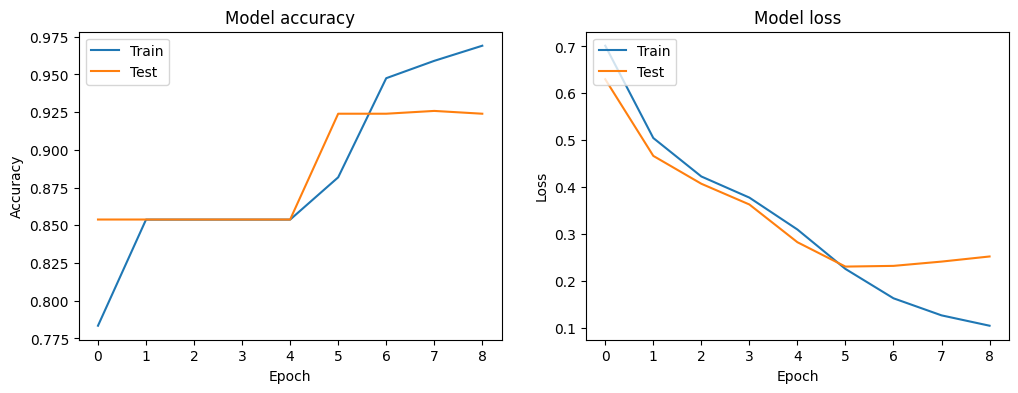

In [ ]:
import matplotlib.pyplot as plt
# Plot the training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      2301
           1       0.78      0.67      0.72       394

    accuracy                           0.92      2695
   macro avg       0.86      0.82      0.84      2695
weighted avg       0.92      0.92      0.92      2695



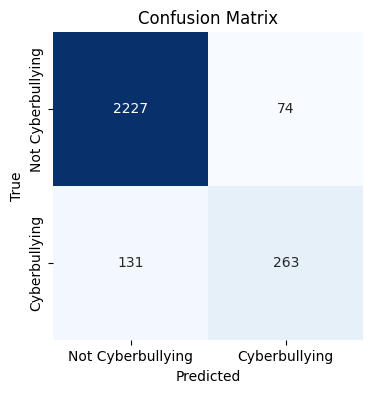

In [ ]:

# Convert predictions to binary labels
binary_predictions = np.round(binary_predictions).astype(int)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, binary_predictions))

# Generate confusion matrix
cm = confusion_matrix(y_test, binary_predictions)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Cyberbullying", "Cyberbullying"],
            yticklabels=["Not Cyberbullying", "Cyberbullying"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Testing
def test_example(example):
    # Preprocess the input example
    no_punctuation = remove_punct(example)
    text_lower = lower(no_punctuation)
    no_stopwords = remove_stopwords(text_lower)
    separate_words = smile_handle(no_stopwords)
    lemmatization = lemmatize(separate_words)
    testing_example = [lemmatization]
    testing_example = tokenizer.texts_to_sequences(testing_example)
    testing_example = pad_sequences(testing_example, maxlen=max_size, padding='post')

    # Make prediction using the model
    predict = model.predict(testing_example)
    predict = np.round(predict).astype(int)
    # Interpret the prediction
    interpretations = {
        0: "Not Cyberbullying",
        1: "Cyberbullying",
    }

    for i in interpretations.keys():
        if i == predict:
            return interpretations[i]

In [ ]:
# Example usage
#example = "Girl bully’s as well. I’ve 2 sons that were bullied in Jr High. Both were bullied by girls. My older was bullied because he had 4ft long brown hair and a baby face. Younger was bullied cuz he hung around the nerd crowd and was an easy target. I know what u mean though! Peace"
example="@semzyxx Do you approve of your pedophile prophet raping a 9 year old girl, like it says in 7 hadith?"
prediction = test_example(example)
print("Prediction:", prediction)

1/1 [==============================] - 0s 34ms/step
Prediction: Cyberbullying


In [ ]:
import tensorflow as tf
model.save('trained_model.h5')

# Loading the model
loaded_model = tf.keras.models.load_model('trained_model.h5')

In [ ]:
#Testing
def test_example(example):
    # Preprocess the input example
    no_punctuation = remove_punct(example)
    text_lower = lower(no_punctuation)
    no_stopwords = remove_stopwords(text_lower)
    separate_words = smile_handle(no_stopwords)
    lemmatization = lemmatize(separate_words)
    testing_example = [lemmatization]
    testing_example = tokenizer.texts_to_sequences(testing_example)
    testing_example = pad_sequences(testing_example, maxlen=max_size, padding='post')

    # Make prediction using the model
    predict = loaded_model.predict(testing_example)
    predict = np.round(predict).astype(int)
    # Interpret the prediction
    interpretations = {
        0: "Not Cyberbullying",
        1: "Cyberbullying",
    }

    for i in interpretations.keys():
        if i == predict:
            return interpretations[i]

In [ ]:
example="@Skawtnyc @athenahollow @twoscooters i don't tend to talk about it much. :P personal info."
prediction = test_example(example)
print("Prediction:", prediction)

1/1 [==============================] - 0s 224ms/step
Prediction: Not Cyberbullying
